In [130]:
# import load_mnist
import numpy as np
import matplotlib.pylab as plt
from torchvision import transforms
import torch
# from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import mnist_reader
%matplotlib inline

In [131]:
X_fashion_train, y_fashion_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_fashion_test, y_fashion_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [134]:
len(X_fashion_train)

60000

In [139]:
class Fashion_MNIST(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx]).reshape(1,28,28).type(torch.FloatTensor)
        label = torch.tensor(self.labels[idx], dtype=torch.int).type(torch.LongTensor)
#         label = torch.from_numpy(self.labels[idx]).type(torch.LongTensor)

        return [image, label]

In [140]:
fashion_train_ds = Fashion_MNIST(X_fashion_train, y_fashion_train)
train_loader = torch.utils.data.DataLoader(fashion_train_ds, batch_size=1, num_workers=1)

for i, item in enumerate(train_loader):
    print(item[0].type())
#     print(item[0].data.cpu().numpy()[0].shape)
#     print(item[1].data.cpu().numpy()[0])
    break
    # TODO do stuff
#     img = item[0]
#     label = item[1]
    
#     plt.figure(figsize=(3,3))
#     plt.title("Image: {}, Label: {}, Prediction: ?".format(i, label[3]), {'fontsize': 10})
#     plt.axis('off')
#     plt.imshow(img[3].reshape(40, 40))
#     break

torch.FloatTensor


In [106]:
class Cluttered_MNIST(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx].reshape(1,40,40))
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(self.labels[idx][0], dtype=torch.int).type(torch.LongTensor)

        return [image, label]

In [80]:
mnist_cluttered = np.load('./mnist_sequence1_sample_5distortions5x5.npz')

X_train = mnist_cluttered['X_train']
y_train = mnist_cluttered['y_train']
X_valid = mnist_cluttered['X_valid']
y_valid = mnist_cluttered['y_valid']
X_test = mnist_cluttered['X_test']
y_test = mnist_cluttered['y_test']

In [109]:
train_ds = Cluttered_MNIST(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=1, num_workers=1)

for i, item in enumerate(train_loader):
#     print(item[0].data.cpu().numpy()[0].shape)
    print(item[1].data.cpu().numpy()[0])
    break
    # TODO do stuff
#     img = item[0]
#     label = item[1]
    
#     plt.figure(figsize=(3,3))
#     plt.title("Image: {}, Label: {}, Prediction: ?".format(i, label[3]), {'fontsize': 10})
#     plt.axis('off')
#     plt.imshow(img[3].reshape(40, 40))
#     break

9


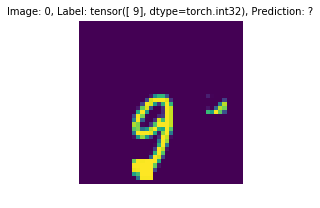

In [61]:
valid_ds = Cluttered_MNIST(X_valid, y_valid)
valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size=4, num_workers=1)

for i, (img, label) in enumerate(valid_loader):
    
    # TODO do stuff
    
#     plt.figure(figsize=(3,3))
#     plt.title("Image: {}, Label: {}, Prediction: ?".format(i, label[2]), {'fontsize': 10})
#     plt.axis('off')
#     plt.imshow(img[2].reshape(40, 40))
#     break

##### Visualize batch

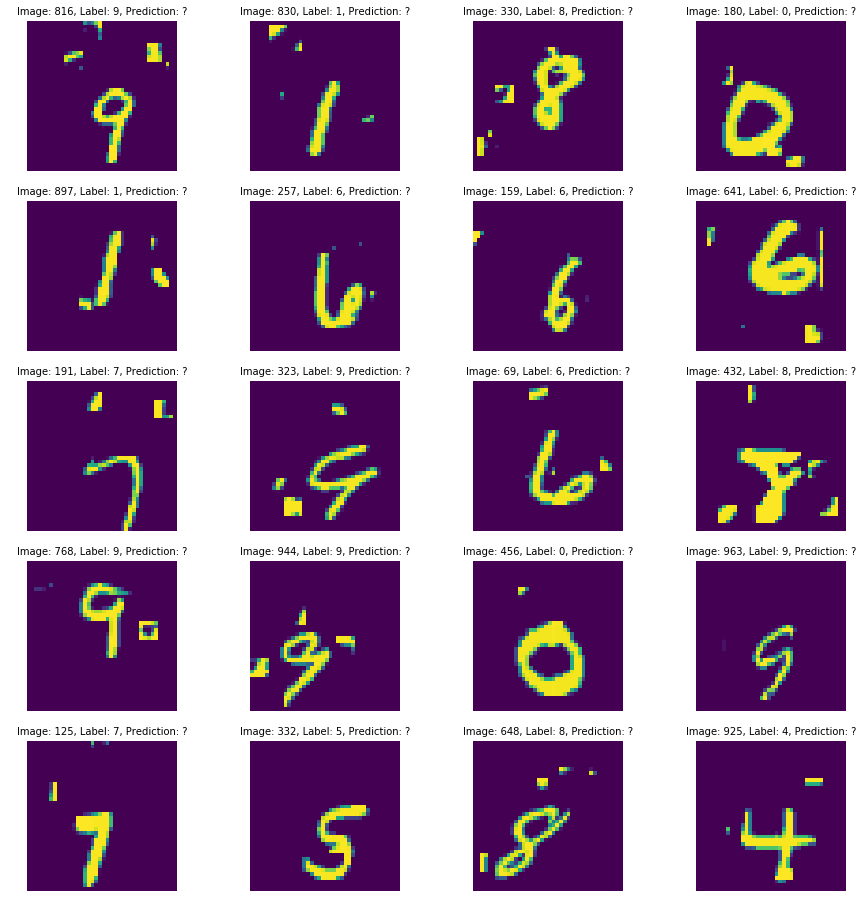

In [25]:
np.random.seed = 99
example_indices = np.random.randint(1, 1000, size=20)

ith = 0
plt.rcParams['figure.figsize'] = (16.0, 16.0)
plt.subplots_adjust(wspace=0, hspace=.2)
for index in example_indices:
    
    plt.subplot(5, 4, ith+1)
    plt.imshow(mnist_cluttered['X_test'].reshape(1000, 40, 40)[index, ...])
    
    truth = mnist_cluttered['y_test'][index][0]

    plt.title("Image: {}, Label: {}, Prediction: ?".format(index, truth), {'fontsize': 10})
    plt.axis('off')
    ith += 1